## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la Computación
## Carrera: Ingeníeria en Computación Inteligente
### Curso: Metaheuristicas I
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumno: Diego Alberto Aranda Gonzalez
### Semestre: Agosto_Diciembre del 2024

## Practica No.4 Optimización por enjambre de particulas (PSO)
### PSO es un algoritmo de optimización basado en la simulación de la conducta social de organismos, como bandadas de aves o banco de peces. En esta practica implementamos PSO para buscar el optimo global de uan función en 2D (f(x) = x^2) y graficamos la funcion.

#### Paso 1: Importar las librerias necesarias

In [23]:
import numpy as np
import random as rd

#### Paso 2: Definir la función objetivo

In [24]:
def objective_function(x):
  return x**2

#### Paso 3: Inicializar los parámetros del PSO

In [25]:
#Parametros PSO
num_particles = 30
num_dimensions = 1
num_iterations = 100
w = 0.5 #Factor de Inercia que controla 
c1 = 1.5 #Coeficiente cognitiva
c2 = 2.0 #Coeficiente social

#Limites de la busqueda
bounds = (-10, 10)

history_positions = []

#### Paso 4: Calcular el Fitness

In [26]:
#Inicializar las particulas
particles = np.random.uniform(bounds[0], bounds[1], (num_particles,num_dimensions))
velocities = np.random.uniform(-1,1,(num_particles,num_dimensions))

#Inicializar las mejores posiciones individuales y globales
p_best_position = particles.copy()
p_best_value = np.array([objective_function(x) for x in particles])
g_best_position = p_best_position[np.argmin(p_best_value)] #minimo de los valores p_best
g_best_value = np.min(p_best_value) #Valor de la función para 

In [27]:
particles

array([[ 9.68800522],
       [-1.78409917],
       [ 4.78101267],
       [-5.67170834],
       [ 0.43386452],
       [-7.41279974],
       [ 8.78574487],
       [-1.04911593],
       [-1.07337268],
       [ 3.8858281 ],
       [-0.26094206],
       [-0.91030233],
       [-3.26729038],
       [-9.18995177],
       [ 0.74428008],
       [ 6.49662664],
       [-1.83077531],
       [ 1.82826849],
       [ 9.43563416],
       [-7.99510173],
       [-1.61354242],
       [-0.04535118],
       [ 5.61138416],
       [ 9.58938573],
       [ 9.60720032],
       [-4.22127537],
       [ 4.0520817 ],
       [ 5.03006995],
       [-1.94360804],
       [ 6.55236681]])

#### Paso 5: Implementar el ciclo principal del PSO

In [28]:
for t in range(num_iterations):
    for i in range(num_particles):
        fitness = objective_function(particles[i])
        
        if fitness > p_best_value[i]:
            p_best_value[i] = fitness
            p_best_position[i] = particles[i].copy()
            
        if fitness < g_best_value:
            g_best_value = fitness
            g_best_position = particles[i].copy()
    
    for i in range(num_particles):
        r1 = rd.random()
        r2 = rd.random()
        
        #La formula es la del apunte!!
        velocities[i] = (w * velocities[i]) + (c1 * r1) * (p_best_position[i]-particles[i]) + c2*r2*(g_best_position-particles[i])
        particles[i] = particles[i] + velocities[i]
        
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])
    
    history_positions.append(particles.copy())
    print(f'Iteracion: {t+1}/{num_iterations}, Mejor valor global: {g_best_value}')

print(f'Mejor posicion encontrada: {g_best_position}, con valor: {g_best_value}')

Iteracion: 1/100, Mejor valor global: 0.0020567298176921026
Iteracion: 2/100, Mejor valor global: [0.00097037]
Iteracion: 3/100, Mejor valor global: [0.00097037]
Iteracion: 4/100, Mejor valor global: [0.00027902]
Iteracion: 5/100, Mejor valor global: [0.00013552]
Iteracion: 6/100, Mejor valor global: [0.00013552]
Iteracion: 7/100, Mejor valor global: [6.33645214e-07]
Iteracion: 8/100, Mejor valor global: [6.33645214e-07]
Iteracion: 9/100, Mejor valor global: [6.33645214e-07]
Iteracion: 10/100, Mejor valor global: [6.33645214e-07]
Iteracion: 11/100, Mejor valor global: [6.33645214e-07]
Iteracion: 12/100, Mejor valor global: [6.33645214e-07]
Iteracion: 13/100, Mejor valor global: [6.33645214e-07]
Iteracion: 14/100, Mejor valor global: [6.33645214e-07]
Iteracion: 15/100, Mejor valor global: [6.33645214e-07]
Iteracion: 16/100, Mejor valor global: [6.33645214e-07]
Iteracion: 17/100, Mejor valor global: [6.33645214e-07]
Iteracion: 18/100, Mejor valor global: [6.33645214e-07]
Iteracion: 19/10

#### Paso 6: Graficar la Función f(x)=x^2

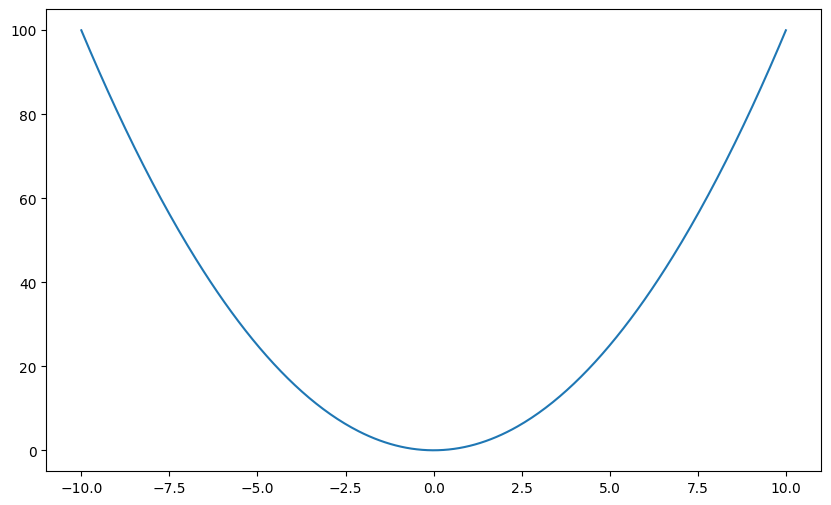

In [29]:
x_values = np.linspace(-10,10,400)
y_values = objective_function(x_values)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(x_values, y_values, label='f(x) = x^2')

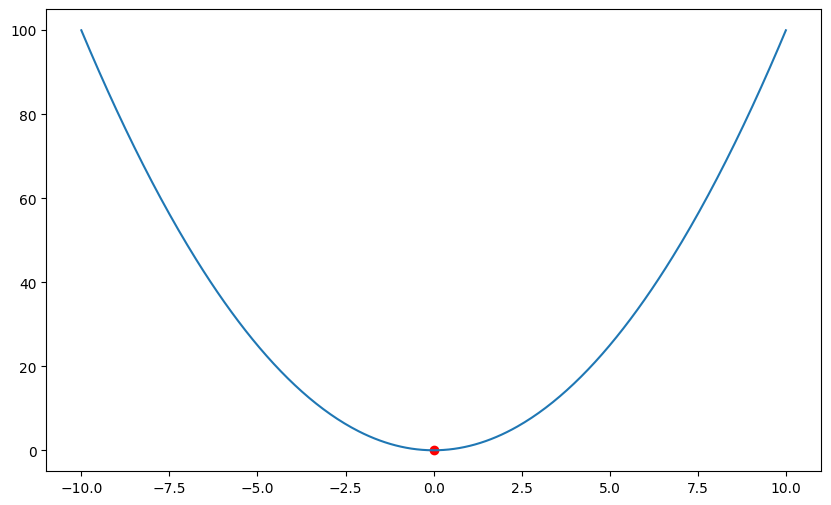

In [30]:
x_values = np.linspace(-10,10,400)
y_values = objective_function(x_values)

plt.figure(figsize=(10,6))
plt.plot(x_values, y_values, label='f(x) = x^2')

plt.scatter((g_best_position), objective_function(g_best_position), color='red', label='Mejor posicion encontrada')

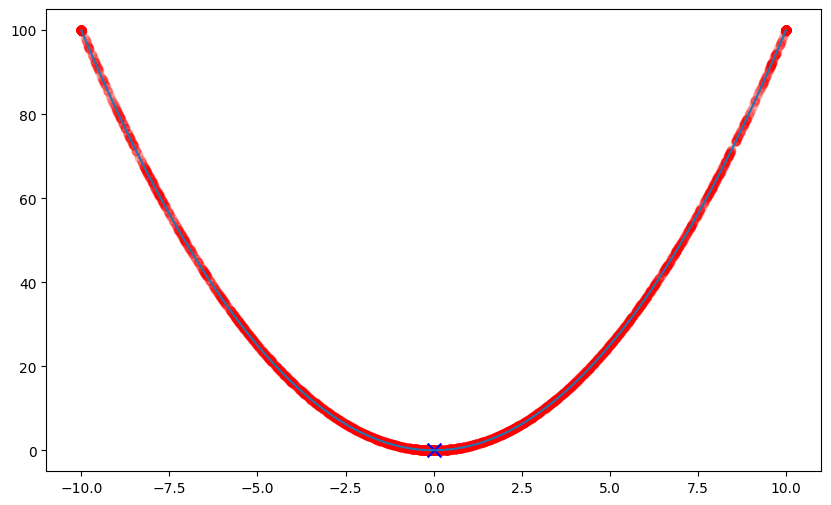

In [31]:
x_values = np.linspace(-10,10,400)
y_values = objective_function(x_values)

plt.figure(figsize=(10,6))
plt.plot(x_values, y_values, label='f(x) = x^2')

for position in history_positions:
    plt.scatter(position, objective_function(position), color='red', alpha=0.2)

plt.scatter((g_best_position), objective_function(g_best_position), color='blue',marker='x',s=100, label='Mejor posicion encontrada')

#### Conclusiones

##### PSO es un algoritmo de optimización basado en la simulación de la conducta social de organismos, como bandadas de aves o bancos de peces. En esta practica implementamos PSO para buscar el optimo global de una función 2D (f(x) = x^2).

#### Referencias
##### [13] KENNEY, James y EBERHART, Rusell C,. Particle Swarm Optimization. Neural Networks, 1995. Proceedings., IEEE International Conference on vol. 4 p. 1942-1948.